In [19]:
import fnmatch
import matplotlib.pyplot as plt
from scapy.all import *

def generate_packet_sizes_histogram(pcap_file1, pcap_file2, dest_ip):
	packet_sizes1 = []
	packet_sizes2 = []

	# Extrahieren der Paketgrößen für die erste pcap-Datei
	packets1 = rdpcap(pcap_file1)
	for packet in packets1:
		if IP in packet and fnmatch.fnmatch(packet[IP].dst, dest_ip):
			packet_sizes1.append(packet[IP].len)

	# Extrahieren der Paketgrößen für die zweite pcap-Datei
	packets2 = rdpcap(pcap_file2)
	for packet in packets2:
		if IP in packet and fnmatch.fnmatch(packet[IP].dst, dest_ip):
			packet_sizes2.append(packet[IP].len)

	return (packet_sizes1, packet_sizes2)

In [20]:
    
# Beispielaufruf des Skripts
pcap_file1 = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\RAW - Wifi_android\capture-4.pcap"
# pcap_file1 = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\RAW - Wifi_android\capture-5.pcap"
pcap_file2 = r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Raw_data\capture-PC_Ether-1.pcap"
dest_ip = '192.168.4.*'
(packet_sizes1, packet_sizes2) = generate_packet_sizes_histogram(pcap_file1,pcap_file2, dest_ip)



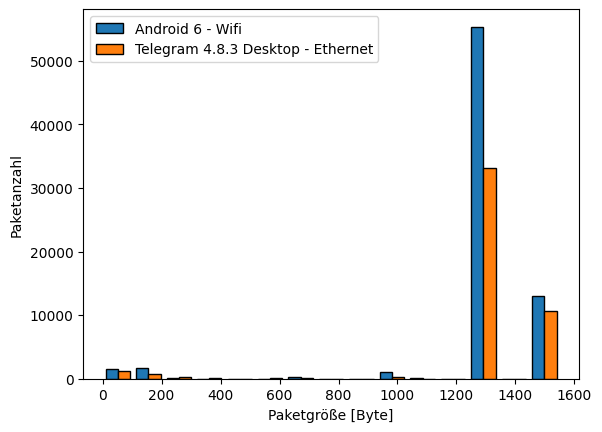

In [67]:
# Erzeugen des Histogramms
plt.hist([packet_sizes1, packet_sizes2], bins=15, range=(0, 1550), edgecolor='black', label=["Android 6 - Wifi", "Telegram 4.8.3 Desktop - Ethernet"])
plt.xlabel('Paketgröße [Byte]')
plt.ylabel('Paketanzahl')
# plt.title('Packet Sizes Histogram')
plt.legend()
plt.savefig(os.path.join(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images","Pcap_Ethernet_Vs_Wifi_V2"), dpi=300)
plt.show()






0.8425004750561462


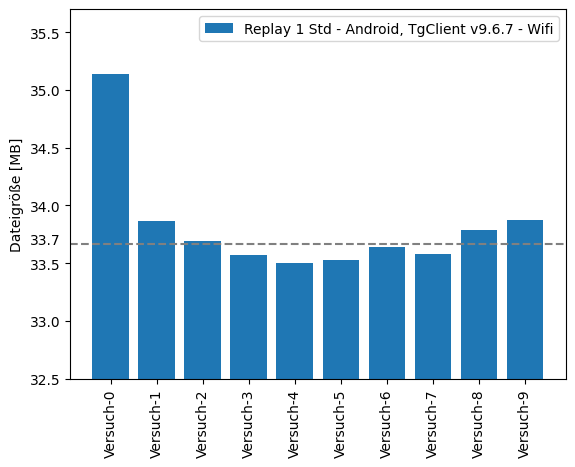

In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os



# Liste der JSON-Dateien
json_files = [
    # r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\RAW - Wifi_android\pcapAnalyzeResult_2023-06-30-16-02-28.json",
    # r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\PC_Windows_Ethernet\Raw_data\pcapAnalyzeResult_2023-06-30-17-17-09.json",
    r"C:\Users\Linus\git\cryptCorr\MainProject\IMSniff_Testbed_OpenTAP\bin\Debug x64\Results\Sammlung\Recording_ShortForReproduciability\RecordedData\pcapAnalyzeResult_2023-06-30-17-33-50.json"
]

# Erzeugen der Figure und des Axes-Objekts
fig, ax = plt.subplots()

def calculate_absolute_deviation(array):
    mean = np.mean(array)
    deviations = np.abs(array - mean)
    return deviations

def average_relative_deviation(array):
    mean = np.mean(array)
    deviations = np.abs(array - mean) / mean
    average_deviation = np.mean(deviations)
    average_deviation_percentage = average_deviation*100
    return average_deviation_percentage

# Laden der Daten aus den JSON-Dateien und Erzeugen der Balkenreihen
for i, json_file in enumerate(json_files):
    with open(json_file, "r") as f:
        data = json.load(f)
    
    # Extrahieren der Dateinamen und Dateigrößen
    file_names = [(d['filePath'].split('\\')[-1]) for d in data]
    file_sizes = [d['totalSize']/1000000 for d in data]
    
    # Erzeugen der Balkenreihe für die aktuelle JSON-Datei
    ax.bar(["Versuch-{}".format(i) for i in range(len(data))], file_sizes, label=f"Replay 1 Std - Android, TgClient v9.6.7 - Wifi")

avg = np.mean(file_sizes[1:])

avgRelDev = average_relative_deviation(file_sizes[1:])
avgAbsDev = calculate_absolute_deviation(file_sizes[1:])
print(avgRelDev)
# plt.errorbar(10,avg, np.avg(avgAbsDev),fmt='o', capsize=6, linewidth=2)
plt.axhline(avg, color='gray', linestyle='--')
plt.text(-1.75,avg,f"{np.round(avg,1)}")
# Anpassen der Darstellung des Diagramms
# ax.set_xlabel('Datei')
ax.set_ylabel('Dateigröße [MB]')
# ax.set_title('Verlauf der Dateigrößen')
ax.set_ylim(3.25*10,3.57*10)
ax.legend()
plt.xticks(rotation=90)
plt.savefig(os.path.join(r"C:\Users\Linus\git\cryptCorr\Bachelorarbeit\Batschi\Thesis\images","Pcap_Caching_SizeVerlauf"), dpi=300)
# Anzeigen des Diagramms
plt.show()
